# 🤖 Use Pre-trained CNN Models to Identify MPox

Here, we are going to use a few pre-trained CNN models to identify MPox from other dermatological diseases. The dataset we are using has the following sets of images.

- Actinic keratoses
- Basal cell carcinoma
- Benign keratosis-like lesions
- Chickenpox
- Cowpox
- Dermatofibroma
- Healthy
- HFMD
- Measles
- Melanocytic nevi
- Melanoma
- Monkeypox
- Squamous cell carcinoma
- Vascular lesions

We are going to use the following pre-trained CNN models to identify MPox.

- ***ResNet50V2***
  - ResNet50V2 is an improved version of the ResNet50 deep convolutional neural network architecture, designed with batch normalization before activation functions and identity mapping to enhance training stability and performance for image recognition tasks.<br><br>
- ***InceptionResNetV2***
  - The InceptionResNetV2 model is a deep convolutional neural network that combines the Inception architecture’s efficiency in feature extraction with the ResNet framework’s skip connections, enabling faster training and improved performance for image recognition tasks.<br><br>
- ***Xception***
  - The Xception model is a deep convolutional neural network architecture that improves performance by using depthwise separable convolutions, optimizing both accuracy and computational efficiency and is an extension of the Inception architecture.<br><br>
- ***VGG16***
  - VGG16 is a deep convolutional neural network architecture with 16 layers, known for its simplicity and uniform structure, using small 3x3 convolutional filters for feature extraction and achieving strong performance in image recognition tasks.<br><br>
- ***VGG19***
  - VGG19 is a deep convolutional neural network architecture with 19 layers, similar to VGG16, but with additional convolutional layers, designed to extract detailed features using small 3x3 filters for image recognition tasks.<br><br>
- ***MobileNetV2***
  - MobileNetV2 is a lightweight convolutional neural network architecture optimized for mobile and embedded devices, featuring depthwise separable convolutions and an innovative inverted residual structure with linear bottlenecks for efficient feature extraction.

## 🗂️ Import Libraries

The following code block imports all the libraries that are necessary for our development purposes.

#### 🔢 `numpy`
- NumPy is a powerful Python library used for numerical computing, providing support for large, multi-dimensional arrays, matrices, and high-level mathematical functions to operate on them efficiently.

#### 🐼 `pandas`
- Pandas is a Python library designed for data manipulation and analysis, offering easy-to-use data structures like DataFrames and Series for handling structured data efficiently.

#### 👣 `pathlib`
- Pathlib is a Python library that provides an object-oriented interface for working with filesystem paths, making path manipulation and file operations more intuitive and cross-platform.

#### 📈 `matplotlib`
- Matplotlib is a Python library for creating static, interactive, and animated visualizations in a variety of formats, including plots, graphs, and charts.

#### ⚡ `tensorflow`
- TensorFlow is an open-source library designed for building and deploying machine learning and deep learning models, offering a flexible ecosystem for numerical computation and AI development.

#### 🧠 `keras`
- Keras is a high-level deep learning library in Python that simplifies the creation and training of neural networks by providing an intuitive interface to underlying frameworks like TensorFlow.

#### 🌊 `seaborn`
- Seaborn is a Python library built on Matplotlib that simplifies creating aesthetically pleasing and informative statistical graphics for data visualization.

#### 💻 `os`
- The os library in Python provides a way to interact with the operating system, enabling tasks such as file and directory manipulation, environment variable access, and process management.

#### 🔬 `scikit-learn`
- Scikit-learn is a Python library that provides simple and efficient tools for data mining, data analysis, and machine learning, including classification, regression, and clustering algorithms.

#### 📄 `shutil`
- The shutil library in Python provides a suite of functions for high-level file operations, including copying, moving, renaming, and deleting files and directories.

### 🎲 `random`
- The random library in Python provides functions to generate random numbers, select random elements, and perform random operations like shuffling and sampling, useful for simulations, games, and probabilistic programming.

### ⚠️ `warnings`
- The warnings library in Python is used to issue, control, and filter warning messages during runtime, helping developers identify and address potential issues in their code without interrupting program execution.

In [1]:
# 🗂️ Import Libraries

import numpy as np
import pandas as pd
from pathlib import Path
import os
import random
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from keras_tuner import Hyperband
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, VGG19, MobileNetV2, ResNet50V2, InceptionResNetV2, Xception
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import shutil

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## ♾️ Constants

While proceeding with the process, we need some constants that may refer to the directory paths, image category names, data generation properties, etc.

In [2]:
# ♾️ Constants

# Directory Paths
DATA_PATH = './data/original'
CNN_PATH = './data/cnn'
MODELS_PATH = './models/cnn'

TRAIN_DIRECTORY = 'train'
TEST_DIRECTORY = 'test'
VALIDATION_DIRECTORY = 'val'


# Directories containing the images
SUB_DIRECTORIES = [TRAIN_DIRECTORY, TEST_DIRECTORY, VALIDATION_DIRECTORY]
DATA_DIRECTORIES = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'Healthy', 'HFMD', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']
# DATA_DIRECTORIES = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Healthy', 'HFMD', 'Melanocytic nevi', 'Melanoma', 'Monkeypox']


# Model-related constants
# Dictionary mapping model names to their preprocessing functions
PREPROCESSING_FUNCTIONS = {
    "VGG16": tf.keras.applications.vgg16.preprocess_input,
    "VGG19": tf.keras.applications.vgg19.preprocess_input,
    "MobileNetV2": tf.keras.applications.mobilenet_v2.preprocess_input,
    "ResNet50V2": tf.keras.applications.resnet_v2.preprocess_input,
    "InceptionResNetV2": tf.keras.applications.inception_resnet_v2.preprocess_input,
    "Xception": tf.keras.applications.xception.preprocess_input
}

MODELS_TO_TEST = {
    "VGG16": VGG16,
    "VGG19": VGG19,
    "MobileNetV2": MobileNetV2, 
    "ResNet50V2": ResNet50V2, 
    "InceptionResNetV2": InceptionResNetV2,
    "Xception": Xception
}

## 🧮 Get Number of Images

Get the number of images in each directory and sub-directory to get an understanding of the dataset.

In [3]:
# 🧮 Get Number of Images

# This method is used to get the number of images in each of the directories in our dataset
def count_images(dir_name):
    for dataset_type in SUB_DIRECTORIES:
        total = 0
        dir_type = os.path.join(dir_name, dataset_type)
        print(f"{dataset_type}")
        print("----------------------------")
        for category in os.listdir(dir_type):
            category_path = os.path.join(dir_type, category)
            if not os.path.isdir(category_path):
                continue
            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {category_path.split('/')[-1]}: {len(images)}")
            total += len(images)
        print(f"Total image count: {total}")
        print("")

In [4]:
# Execute the method
count_images(DATA_PATH)

train
----------------------------
Number of images in Benign keratosis-like lesions: 1000
Number of images in Cowpox: 792
Number of images in Healthy: 1000
Number of images in Actinic keratoses: 693
Number of images in Melanoma: 1000
Number of images in HFMD: 1000
Number of images in Melanocytic nevi: 1000
Number of images in Measles: 660
Number of images in Chickenpox: 900
Number of images in Basal cell carcinoma: 1000
Number of images in Squamous cell carcinoma: 502
Number of images in Monkeypox: 1000
Number of images in Dermatofibroma: 191
Number of images in Vascular lesions: 202
Total image count: 10940

test
----------------------------
Number of images in Benign keratosis-like lesions: 100
Number of images in Cowpox: 99
Number of images in Healthy: 100
Number of images in Actinic keratoses: 88
Number of images in Melanoma: 100
Number of images in HFMD: 100
Number of images in Melanocytic nevi: 100
Number of images in Measles: 83
Number of images in Chickenpox: 100
Number of ima

## 💾 Create a Dataset in a New Directory

We will copy the data to a new directory to process them more smoothly.

In [5]:
# ⚖️ Create a Balanced Dataset
# This method is used to copy a certain number of images from every, train, test, and validation set.

def copy_data_from_source(source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for dataset_type in SUB_DIRECTORIES:
        source_type_dir = os.path.join(source_dir, dataset_type)
        dest_type_dir = os.path.join(dest_dir, dataset_type)
        os.makedirs(dest_type_dir, exist_ok=True)
        for category in os.listdir(source_type_dir):
            category_path = os.path.join(source_type_dir, category)
            if not os.path.isdir(category_path):
                continue
            dest_category_path = os.path.join(dest_type_dir, category)
            os.makedirs(dest_category_path, exist_ok=True)

            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {dataset_type}/{category_path.split('/')[-1]}: {len(images)}")
            selected_images = random.sample(images, len(images))

            for image in selected_images:
                source_image_path = os.path.join(category_path, image)
                dest_image_path = os.path.join(dest_category_path, image)
                # print(f'Copying {source_image_path} to {dest_image_path}')
                shutil.copy(source_image_path, dest_image_path)          

In [6]:
# Execute the method
copy_data_from_source(DATA_PATH, CNN_PATH)

Number of images in train/Benign keratosis-like lesions: 1000
Number of images in train/Cowpox: 792
Number of images in train/Healthy: 1000
Number of images in train/Actinic keratoses: 693
Number of images in train/Melanoma: 1000
Number of images in train/HFMD: 1000
Number of images in train/Melanocytic nevi: 1000
Number of images in train/Measles: 660
Number of images in train/Chickenpox: 900
Number of images in train/Basal cell carcinoma: 1000
Number of images in train/Squamous cell carcinoma: 502
Number of images in train/Monkeypox: 1000
Number of images in train/Dermatofibroma: 191
Number of images in train/Vascular lesions: 202
Number of images in test/Benign keratosis-like lesions: 100
Number of images in test/Cowpox: 99
Number of images in test/Healthy: 100
Number of images in test/Actinic keratoses: 88
Number of images in test/Melanoma: 100
Number of images in test/HFMD: 100
Number of images in test/Melanocytic nevi: 100
Number of images in test/Measles: 83
Number of images in 

## 🗃️ Creating File Data Frame for Train Dataset

Now, we have all the required images to make our CNN model.

Next, to make our CNN model, we need to create a data frame that will contain the paths and the names of the dermatological diseases. 

After creating the data frame, we can check whether there is a data imbalance or not with a pie chart.

In [7]:
# 🗃️ Creating File Data Frame for Train Dataset

def load_images_to_df(base_path, dataset_type):
    # Load the base directory path
    path = os.path.join(base_path, dataset_type)
    image_dir = Path(path)

    # Get file paths and assign labels
    file_paths = list(image_dir.glob(r'**/*.jpg'))
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_paths))

    file_paths = pd.Series(file_paths, name='Path').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate file paths and labels
    image_df = pd.concat([file_paths, labels], axis=1)

    # Get samples according to the sample size
    samples = []
    for record in image_df['Label'].unique():
        samples.append(image_df[image_df['Label']==record])
    image_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

    # Return the data frame
    return image_df

In [8]:
# Get the images of the train set
image_df_train = load_images_to_df(CNN_PATH, TRAIN_DIRECTORY)

# Show output
image_df_train.head(10)

,Path,Label
0,data/cnn/train/Benign keratosis-like lesions/I...,Benign keratosis-like lesions
1,data/cnn/train/Healthy/HEALTHY_59_02_8.jpg,Healthy
2,data/cnn/train/Melanocytic nevi/ISIC_0010040.jpg,Melanocytic nevi
3,data/cnn/train/Healthy/HEALTHY_26_02_8.jpg,Healthy
4,data/cnn/train/Monkeypox/MKP_142_06_9.jpg,Monkeypox
5,data/cnn/train/Vascular lesions/ISIC_0027269.jpg,Vascular lesions
6,data/cnn/train/Melanocytic nevi/ISIC_0011214.jpg,Melanocytic nevi
7,data/cnn/train/Healthy/HEALTHY_58_01_ORIGINAL.jpg,Healthy
8,data/cnn/train/Cowpox/CWP_19_01_13.jpg,Cowpox
9,data/cnn/train/Benign keratosis-like lesions/I...,Benign keratosis-like lesions


In [9]:
image_df_train.describe()

,Path,Label
count,10940,10940
unique,10940,14
top,data/cnn/train/Benign keratosis-like lesions/I...,Benign keratosis-like lesions
freq,1,1000


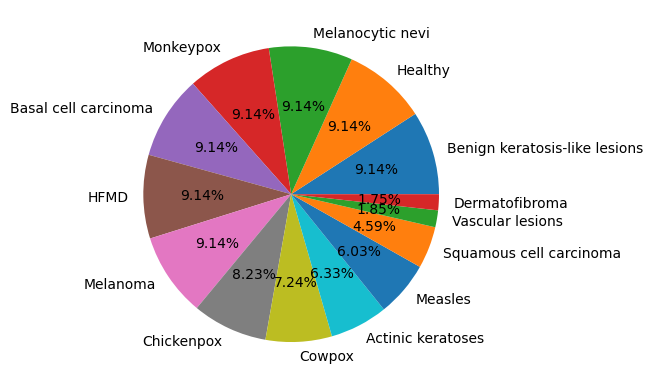

In [10]:
# Show the number of images to show there are no biases in the image set
pie = image_df_train['Label'].value_counts()
pie.plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.show()

## 🖥️ Display Images of the Dataset

Since we see that there is no data imbalance, the next step is to see whether our data has been loaded correctly or not in our data frame.

We can check that by plotting a sample of our images. To do that, we can use the `matplotlib` library.

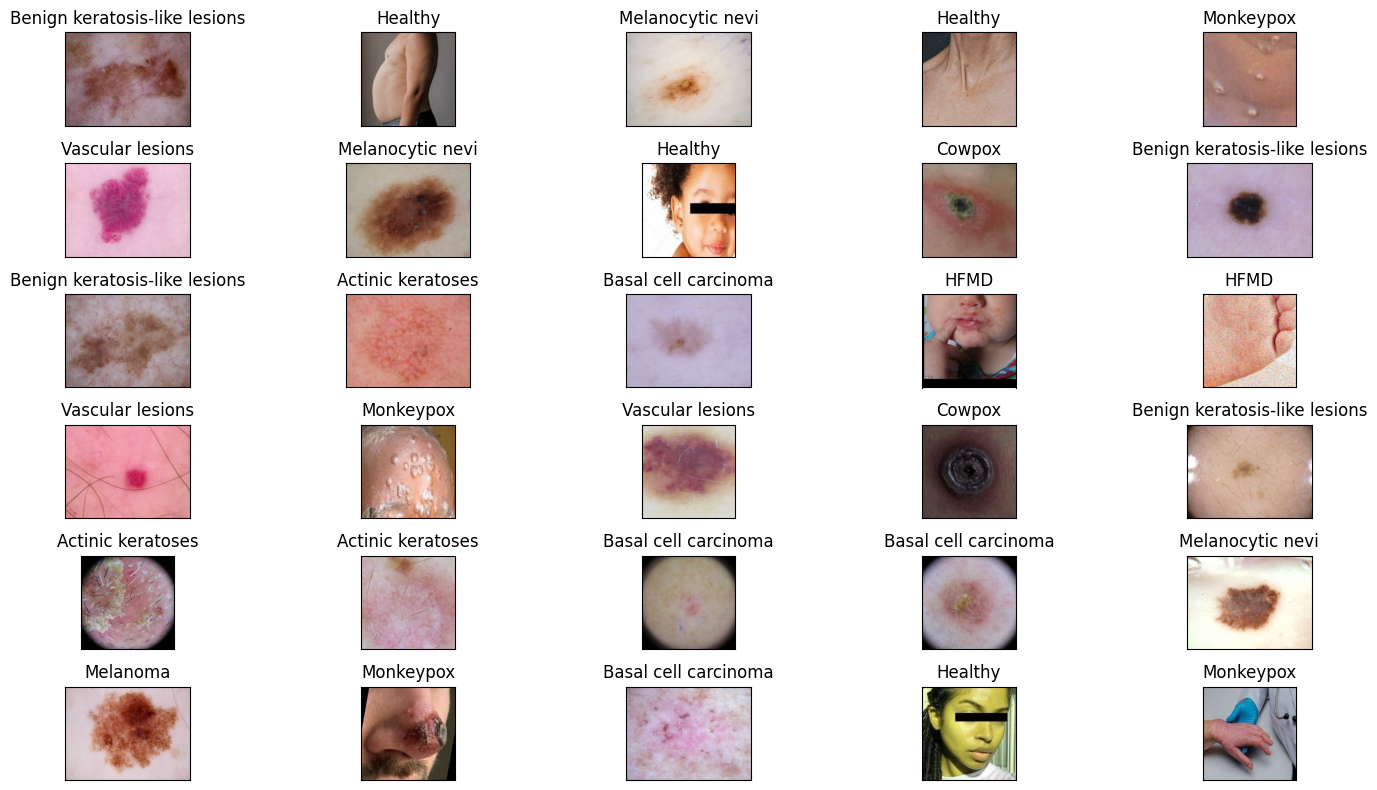

In [11]:
# 🖥️ Display Images of the Dataset

# Define figure and axes
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,8), subplot_kw={'xticks':[], 'yticks':[]})

# Display 30 images of the dataset
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df_train.Path[i], -1))
    ax.set_title(image_df_train.Label[i])
plt.tight_layout()
plt.show()

## 🗃️ Load the Test and Validation Data Frames

Next, load the test and validation data frames so that we can use them to create the models.

In [13]:
# 🗃️ Load the Test and Validation Data Frames

image_df_test = load_images_to_df(CNN_PATH, TEST_DIRECTORY)
image_df_test.head(10)

,Path,Label
0,data/cnn/test/Actinic keratoses/ISIC_0071669.jpg,Actinic keratoses
1,data/cnn/test/Basal cell carcinoma/ISIC_003158...,Basal cell carcinoma
2,data/cnn/test/Vascular lesions/ISIC_0070723.jpg,Vascular lesions
3,data/cnn/test/Benign keratosis-like lesions/IS...,Benign keratosis-like lesions
4,data/cnn/test/Squamous cell carcinoma/ISIC_005...,Squamous cell carcinoma
5,data/cnn/test/Melanoma/ISIC_0014559_downsample...,Melanoma
6,data/cnn/test/Monkeypox/MKP_126_01_ORIGINAL.jpg,Monkeypox
7,data/cnn/test/Basal cell carcinoma/ISIC_002712...,Basal cell carcinoma
8,data/cnn/test/Actinic keratoses/ISIC_0063045.jpg,Actinic keratoses
9,data/cnn/test/Actinic keratoses/ISIC_0072646.jpg,Actinic keratoses


In [14]:
image_df_val = load_images_to_df(CNN_PATH, VALIDATION_DIRECTORY)
image_df_val.head(10)

,Path,Label
0,data/cnn/val/Cowpox/CWP_33_06_10.jpg,Cowpox
1,data/cnn/val/Chickenpox/CHP_53_01_ORIGINAL.jpg,Chickenpox
2,data/cnn/val/Benign keratosis-like lesions/ISI...,Benign keratosis-like lesions
3,data/cnn/val/Chickenpox/CHP_03_01_12.jpg,Chickenpox
4,data/cnn/val/Melanocytic nevi/ISIC_0010572.jpg,Melanocytic nevi
5,data/cnn/val/Measles/MSL_44_01_9.jpg,Measles
6,data/cnn/val/Measles/MSL_37_01_3.jpg,Measles
7,data/cnn/val/Melanocytic nevi/ISIC_0001769_dow...,Melanocytic nevi
8,data/cnn/val/Benign keratosis-like lesions/ISI...,Benign keratosis-like lesions
9,data/cnn/val/HFMD/HFMD_123_01.jpg,HFMD


## ✨ Create Model
The following functions are used to create the models and train them.

In [15]:
# Function to get generators per model
def get_generators_per_model(preprocess_fn):
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    return (train_generator, validation_generator, test_generator)

In [16]:
# Function to load the dataset using the data frame
def create_dataset(generator, image_df, subset):
    images = generator.flow_from_dataframe(
        dataframe=image_df,
        x_col='Path', 
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=42)
    print(f"{subset} class indices: {images.class_indices}\n")
    return images

In [27]:
# Function to build model for hyperparameter tuning
def build_model_with_hp(hp, base_model, num_classes):
    # Start building the model
    inputs = base_model.input

    # Get base model
    x = base_model.output
    # Pooling
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    # Batch Normalization
    x = tf.keras.layers.BatchNormalization()(x)
    # Add first Dense layer with tunable units
    x = tf.keras.layers.Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=32), activation='relu')(x)
    # Add dropout layer with tunable rate
    x = tf.keras.layers.Dropout(rate=hp.Choice('dropout_rate_1', values=[0.2,0.3,0.4,0.5,0.6,0.7]))(x)
    # Batch Normalization
    x = tf.keras.layers.BatchNormalization()(x)
    # Add first Dense layer with tunable units
    x = tf.keras.layers.Dense(units=hp.Int('dense_2_units', min_value=32, max_value=512, step=16), activation='relu')(x)
    # Add dropout layer with tunable rate
    x = tf.keras.layers.Dropout(rate=hp.Choice('dropout_rate_2', values=[0.2,0.3,0.4,0.5,0.6,0.7]))(x)
    # Batch Normalization
    x = tf.keras.layers.BatchNormalization()(x)
    
    # Add final Dense layer with the number of classes
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )
    
    return model

In [28]:
# Function to perform hyperparameter tuning
def perform_hyperparameter_tuning(model_name, base_model_func, train_dataset, val_dataset, num_classes, max_epochs=100):
    print(f"Performing hyperparameter tuning for: {model_name}")
    
    base_model = base_model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    tuner = Hyperband(
        lambda hp: build_model_with_hp(hp, base_model, num_classes),
        objective='categorical_accuracy',
        max_epochs=max_epochs,
        factor=3,
        directory='hyperparameter_tuning',
        project_name=model_name
    )
    
    tuner.search(train_dataset, validation_data=val_dataset, epochs=max_epochs, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min', restore_best_weights=True)])
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best hyperparameters for {model_name}:")
    print(f" - Units: {best_hps.get('units')}")
    print(f" - Dropout Rate: {best_hps.get('dropout_rate')}")
    print(f" - Learning Rate: {best_hps.get('learning_rate')}")
    
    return tuner

## 🛠️ Train and Evaluate Models

The following code explains how to train and evaluate the models.

In [22]:
# 🛠️ Train and Evaluate Models

# Function to train and evaluate models
def train_and_evaluate_model(model_name, base_model_func, train_dataset, val_dataset, test_dataset, model_dict, history_dict, test_accuracy_dict, num_classes, epochs=100):
    print(f"Training model: {model_name}")

    tuner = perform_hyperparameter_tuning(model_name, base_model_func, train_dataset, val_dataset, num_classes)
    
    # Get the best hyperparameters and build the model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    # Load base model
    base_model = base_model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    for layer in base_model.layers[-60:]:
        layer.trainable = True
    
    model = build_model_with_hp(best_hps, base_model, num_classes)
    
    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min', restore_best_weights=True)])
    
    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")

    # Store Results
    model_dict[model_name] = model
    history_dict[model_name] = history
    test_accuracy_dict[model_name] = test_accuracy

    # Save model
    model.save(f"{MODELS_PATH}/mpox_lesion_identification_{model_name}.h5")

In [23]:
# Generate the Classification Report for the Model
def generate_classification_report(model, train_dataset, test_dataset, test_df):
    y_pred = model.predict(test_dataset)
    y_pred = np.argmax(y_pred, axis=1)

    labels = (train_dataset.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_pred = [labels[k] for k in y_pred]

    y_test = list(test_df.Label)
    print(f"Classification Report for {model_name}\n")
    print(classification_report(y_test, y_pred))

In [24]:
# Generate the Confusion Matrix for the Model
def generate_confusion_matrix(model_name, model, train_dataset, test_dataset, test_df):
    y_pred = model.predict(test_dataset)
    y_pred = np.argmax(y_pred, axis=1)

    labels = (train_dataset.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_pred = [labels[k] for k in y_pred]

    y_test = list(test_df.Label)
    
    cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title(f'Normalized Confusion Matrix For {model_name}')
    plt.show()

In [25]:
# Array for holding the results
model_dict = {}
history_dict = {}
test_accuracy_dict = {}

## ◉ VGG16

In [100]:
# VGG16
model_name = "VGG16"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate VGG16
preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

Trial 83 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.10000000149011612
Total elapsed time: 08h 38m 44s

Search: Running Trial #84

Value             |Best Value So Far |Hyperparameter
2048              |3328              |dense_1_units
0.3               |0.4               |dropout_rate_1
1120              |1840              |dense_2_units
0.4               |0.2               |dropout_rate_2
64                |128               |dense_3_units
0.3               |0.3               |dropout_rate_3
0.001             |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round



Traceback (most recent call last):
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 232, in _buil

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/tuners/hyperband.py", line 430, in _build_hypermodel
    model = super()._build_hypermodel(hp)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/var/folders/9d/wb464w3106z5ftt3ymdcn6t00000gn/T/ipykernel_85949/3987978670.py", line 8, in <lambda>
    lambda hp: build_model_with_hp(hp, base_model, num_classes),
  File "/var/folders/9d/wb464w3106z5ftt3ymdcn6t00000gn/T/ipykernel_85949/1593673305.py", line 9, in build_model_with_hp
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/nipunaupeksha/miniconda3/envs/msc/lib/python3.8/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
    raise ValueError(
ValueError: Input 0 of layer "global_average_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 512)


In [ ]:
# Predict and generate classification report for VGG16
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for VGG16
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [34]:
# Get model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## ◉ VGG19

In [ ]:
# VGG19
model_name = "VGG19"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate VGG19

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for VGG19
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for VGG19
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get model summary
model.summary()

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## ◉ MobileNetV2

In [ ]:
# MobileNetV2
model_name = "MobileNetV2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate MobileNetV2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for MobileNetV2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for MobileNetV2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get model summary
model.summary()

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## ◉ ResNet50V2

In [ ]:
# ResNet50V2
model_name = "ResNet50V2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate ResNet50V2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for ResNet50V2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for ResNet50V2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get model summary
model.summary()

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## ◉ InceptionResNetV2

In [98]:
# InceptionResNetV2
model_name = "InceptionResNetV2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate InceptionResNetV2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

Found 10940 validated image filenames belonging to 14 classes.
train class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}

Found 1177 validated image filenames belonging to 14 classes.
val class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}

Found 1185 validated image filenames belonging to 14 classes.
test class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles'

ValueError: Input 0 of layer "global_average_pooling2d_1" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 1536)

In [ ]:
# Predict and generate classification report for InceptionResNetV2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for InceptionResNetV2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get model summary
model.summary()

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## ◉ Xception

In [ ]:
# Xception
model_name = "Xception"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate Xception

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for Xception
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for Xception
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get model summary
model.summary()

In [ ]:
# Print model
tf.keras.utils.plot_model(model, f'MODELS_PATH/images/{model_name}_summary.png', show_shapes=True, dpi=50)

## 📈 Plot the Training and Validation Accuracies

Plot the training and validation accuracies using the dictionaries.

In [ ]:
# Function to plot training and validation accuracies
def plot_training_history(history_dict):
    fig, axes = plt.subplots(len(history_dict), 2, figsize=(12, 6 * len(history_dict)))
    fig.suptitle("Training and Validation Metrics for All Models", fontsize=16)
    
    for idx, (model_name, history) in enumerate(history_dict.items()):
        # Extract metrics
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(acc) + 1)
        
        # Plot accuracy
        ax_acc = axes[idx, 0] if len(history_dict) > 1 else axes[0]
        ax_acc.plot(epochs, acc, 'b-', label='Training Accuracy')
        ax_acc.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
        ax_acc.set_title(f'{model_name} - Accuracy')
        ax_acc.set_xlabel('Epochs')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.legend()
        
        # Plot loss
        ax_loss = axes[idx, 1] if len(history_dict) > 1 else axes[1]
        ax_loss.plot(epochs, loss, 'b-', label='Training Loss')
        ax_loss.plot(epochs, val_loss, 'r-', label='Validation Loss')
        ax_loss.set_title(f'{model_name} - Loss')
        ax_loss.set_xlabel('Epochs')
        ax_loss.set_ylabel('Loss')
        ax_loss.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for title
    plt.show()

In [ ]:
# Call the function to plot
plot_training_history(history_dict)